# Fashion MNIST Classification with a Feedforward Neural Network

This notebook follows the same structure as our MNIST digits example, but instead of digits, we'll classify images of clothing from the **Fashion MNIST** dataset.

Each image is 28x28 pixels and represents an item like a t-shirt, shoe, or bag. You will design your own **feedforward neural network (FFNN)** and train a model that can recognize these items based on pixel patterns.

# -- Starter Code --

## Visualizing the Raw Images

Let's look at a few sample images from the dataset to understand what we're working with.
Each image is a 28x28 grayscale photo of a clothing item.

In [31]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

# Load the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


## Normalizing and Flattening the Data

Before training, we normalize the image data so pixel values are between 0 and 1. Then we flatten the 28x28 images into 784-length vectors since feedforward networks take 1D input.

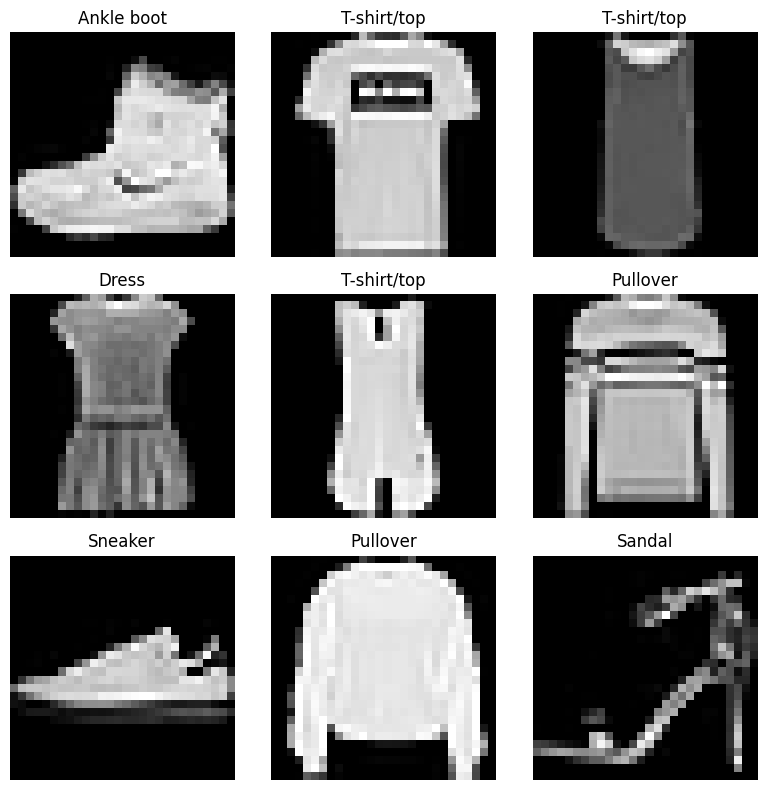

In [32]:
# Class names for display
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Show 9 images with class labels in a 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for ax, i in zip(axes.flat, range(9)):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(class_names[y_train[i]])
    ax.axis('off')

plt.tight_layout()
plt.show()

## Normalizing and Flattening the Data

Before training, we normalize the image data so pixel values are between 0 and 1. Then we flatten the 28x28 images into 784-length vectors since feedforward networks take 1D input.

In [33]:
# Normalize to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Flatten
X_train_flat = X_train.reshape(-1, 28*28)
X_test_flat = X_test.reshape(-1, 28*28)

print("New train shape (flattened):", X_train_flat.shape)
print("New test shape (flattened):", X_test_flat.shape)

New train shape (flattened): (60000, 784)
New test shape (flattened): (10000, 784)


# -- YOUR TURN --

## Building the Feedforward Neural Network

Come up with your own model architeture. Start with something simple. If you are able to get that working, explore alternative designs to see what performs best on the validation set.

In [34]:
# TODO
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(784,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Training the Model

Train the model and evaluate how it performs on the validation set.

In [35]:
# TODO
history = model.fit(X_train_flat, y_train, epochs=10, validation_data=(X_test_flat, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7542 - loss: 0.7079 - val_accuracy: 0.8481 - val_loss: 0.4292
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8558 - loss: 0.4019 - val_accuracy: 0.8522 - val_loss: 0.4086
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8701 - loss: 0.3555 - val_accuracy: 0.8686 - val_loss: 0.3684
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8797 - loss: 0.3266 - val_accuracy: 0.8671 - val_loss: 0.3691
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8834 - loss: 0.3126 - val_accuracy: 0.8692 - val_loss: 0.3674
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8866 - loss: 0.3053 - val_accuracy: 0.8687 - val_loss: 0.3585
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8942 - loss: 0.2844 - val_accuracy: 0.8749 - val_loss: 0.3599
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8981 - loss: 0.2725 

## Evaluating Performance

Check the model's accuracy on the test set and plot how training progressed over time.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8732 - loss: 0.3625
Test Accuracy:  0.8712


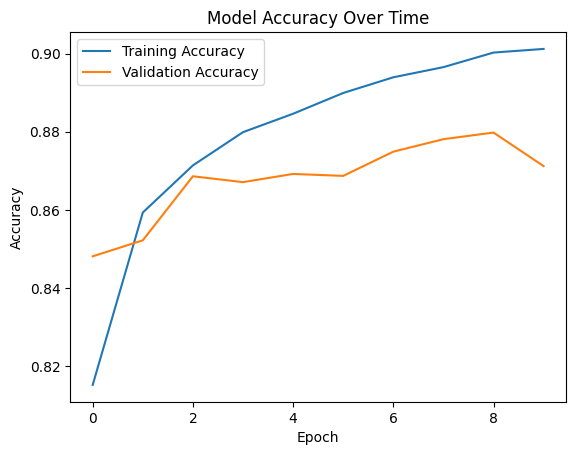

In [36]:
# TODO
test_loss, test_acc = model.evaluate(X_test_flat, y_test)
print(f"Test Accuracy:  {test_acc:.4f}")

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Time')
plt.legend()
plt.show()

## Confusion Matrix

Visualize which classes the model gets confused between.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


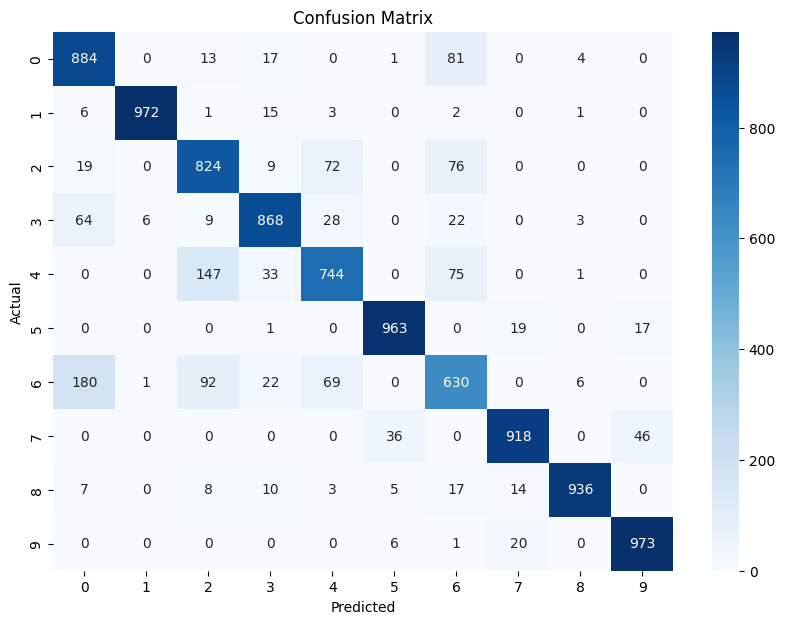

In [37]:
# TODO
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

y_pred_probs = model.predict(X_test_flat)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
